In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
# Thiết lập dữ liệu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
# Lấy dữ liệu và đồng thời thiết lập ảnh 150x150
training=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Nhân diện',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 536 images belonging to 3 classes.


In [17]:
training.class_indices

{'Ban Dong': 0, 'Ban Hau': 1, 'Ban Truong': 2}

In [18]:
x_train,y_train=next(training)
print(x_train.shape)
print(y_train.shape)

(32, 150, 150, 3)
(32, 3)


In [19]:
# Chuẩn hóa dữ liệu

x_train=x_train.astype ('float32')

In [20]:
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [21]:
# Biên dịch 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣20 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(x_train,y_train,epochs=100, batch_size=32,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.3195 - accuracy: 0.4400 - val_loss: 122.4484 - val_accuracy: 0.2857
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 120.8005 - accuracy: 0.3200 - val_loss: 21.0151 - val_accuracy: 0.2857
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 22.5740 - accuracy: 0.2400 - val_loss: 7.9848 - val_accuracy: 0.4286
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 7.5052 - accuracy: 0.4400 - val_loss: 1.7829 - val_accuracy: 0.2857
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 1.7257 - accuracy: 0.2400 - val_loss: 1.5166 - val_accuracy: 0.4286
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 1.1514 - accuracy: 0.5600 - val_loss: 1.1752 - val_accuracy: 0.5714
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.7921 - accuracy: 0.5600 - val_loss: 0.8711 - val_accuracy: 0.7143
Epoch 8/100
1/1 [===========

In [24]:
#Độ chính xác
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0007346798665821552
Train Accuracy 1.0


In [25]:
# Lưu dữ liệu đã train
model.save("CNN_Face3.h5")
model=load_model('CNN_Face3.h5')

[[9.9999034e-01 2.8957179e-06 6.7783722e-06]]
Day la Ban Dong


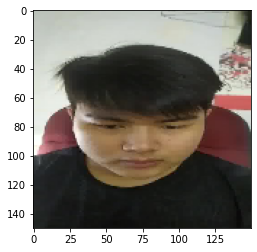

In [29]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Nhân diện/Ban Dong/BanDong (110).jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
result=np.argmax(model.predict(img),axis=1)
x =model.predict(img)
if result==0:
  prediction="Day la Ban Dong"
elif result==1:
  prediction="Day la Ban Hau"
elif result==2:
  prediction="Day la Ban Truong"
print(x)
print(prediction)

[[3.8918202e-05 9.9701035e-01 2.9507370e-03]]
Day la Ban Hau


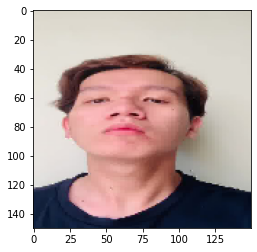

In [30]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Nhân diện/Ban Hau/BanHau (110).jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
result=np.argmax(model.predict(img),axis=1)
x =model.predict(img)
if result==0:
  prediction="Day la Ban Dong"
elif result==1:
  prediction="Day la Ban Hau"
elif result==2:
  prediction="Day la Ban Truong"
print(x)
print(prediction)

[[4.6214996e-08 2.1316879e-07 9.9999976e-01]]
Day la Ban Truong


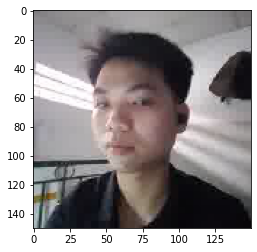

In [31]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Nhân diện/Ban Truong/BanTruong (110).jpg',target_size=(150,150,3))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
result=np.argmax(model.predict(img),axis=1)
x =model.predict(img)
if result==0:
  prediction="Day la Ban Dong"
elif result==1:
  prediction="Day la Ban Hau"
elif result==2:
  prediction="Day la Ban Truong"
print(x)
print(prediction)